In [1]:
from sqlalchemy import *
import numpy as np
import pylab as plt
import pandas as pd
%matplotlib inline

In [3]:
engine = create_engine('sqlite+pysqlite:///../SQL/85_8.db')
import time
start_time = time.time()
ADCdf = pd.io.sql.read_sql("SELECT * FROM ADC", engine)
#Hitdf = pd.io.sql.read_sql("SELECT * FROM Hit", engine)
PSAdf = pd.io.sql.read_sql("SELECT * FROM PSA", engine)
ProtoMapdf = pd.io.sql.read_sql("SELECT * FROM ProtoMap", engine)
#RawADCdf = pd.io.sql.read_sql("SELECT * FROM RawADC", engine)
end_time = time.time()
print end_time-start_time

166.321405888


In [14]:
start_time = time.time()
RawADCdf = pd.io.sql.read_sql("SELECT * FROM RawADC", engine)
end_time = time.time()
print end_time-start_time

163.779122114


In [4]:
def Process(Event):
    mesh = Event.iloc[:,3:][Event.iloc[:,3:]>20].sum(axis=0)
    #print mesh
    return mesh
start_time = time.time()
mesh_df = ADCdf.groupby('EventID').apply(Process)
end_time = time.time()
print end_time-start_time

12.9648270607


In [5]:
def convolve(event):
    mesh_convol = np.convolve(event.values,([1]*10)[::-1],'same')
    return pd.Series(mesh_convol,index=['t'+str(i) for i in range(512)])
convol_df=mesh_df.apply(convolve,axis=1)
convol_df.reset_index(inplace=True)

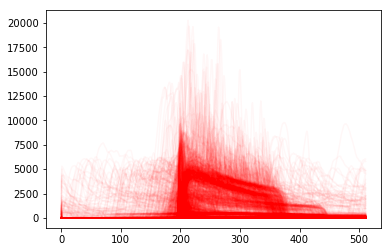

In [6]:
plt.plot(mesh_df.T.values,c=(1,0,0,0.03));

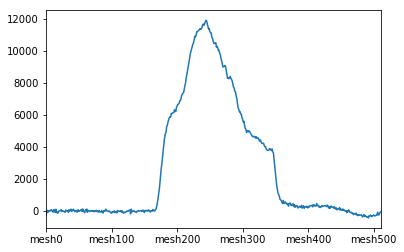

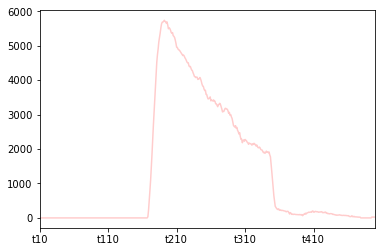

In [31]:
def pp(EID):
    mesh_df.iloc[EID,10:500].plot(c=(1,0,0,0.2))
    #ADCdf[ADCdf['EventID']==EID].sum(axis=0).iloc[10:500].plot(c=(0,1,0,0.2))
#for i in range(300):
EID=0
PSAdf.ix[EID].iloc[3:].plot()
plt.figure()
pp(EID)

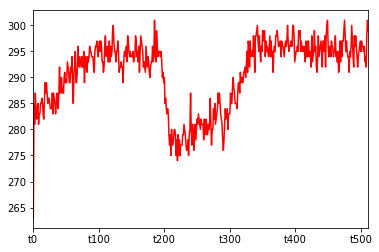

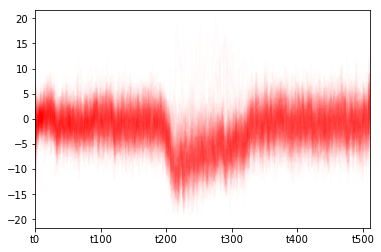

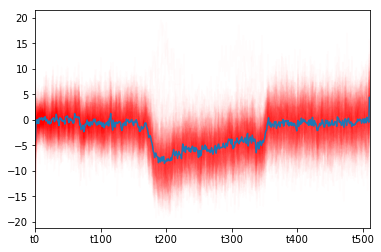

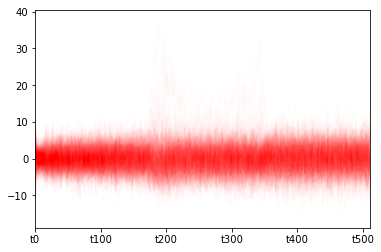

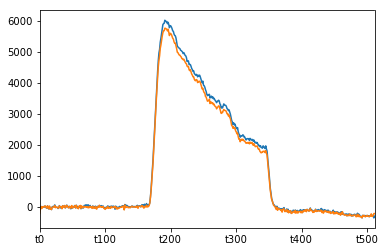

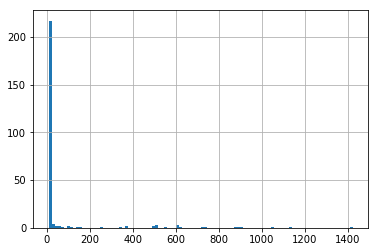

In [45]:
plt.figure()
RawADCdf[RawADCdf['PadNum']==63].iloc[1:2,3:].T.plot(c=(1,0,0,1),legend=False)
plt.figure()
EID=1
#sub = RawADCdf[RawADCdf['EventID']==EID].iloc[:,3:]-316
sub = ADCdf[ADCdf['EventID']==EID].iloc[:,3:]
sub[sub.abs().max(axis=1)<20].T.plot(c=(1,0,0,0.01),legend=False)
plt.figure()
EID=0
#sub = RawADCdf[RawADCdf['EventID']==EID].iloc[:,3:]-316
sub = ADCdf[ADCdf['EventID']==EID].iloc[:,3:]
sub[sub.abs().max(axis=1)<20].T.plot(c=(1,0,0,0.01),legend=False)
sub[sub.abs().max(axis=1)<20].mean(axis=0).plot()
plt.figure()
(sub[sub.abs().max(axis=1)<30]-sub[sub.abs().max(axis=1)<30].mean(axis=0)).T.plot(c=(1,0,0,0.01),legend=False)
plt.figure()
(sub[sub.abs().max(axis=1)>30]-sub[sub.abs().max(axis=1)<30].mean(axis=0)).sum(axis=0).plot()
(sub[sub.abs().max(axis=1)>30]).sum(axis=0).plot()
plt.figure()
sub.abs().max(axis=1).hist(bins=100)

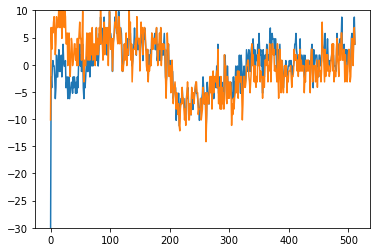

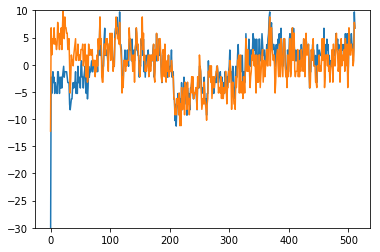

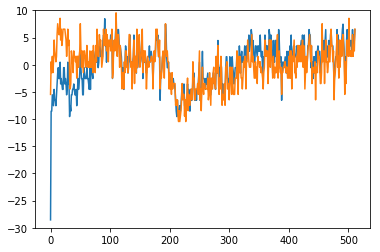

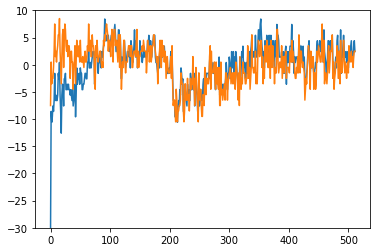

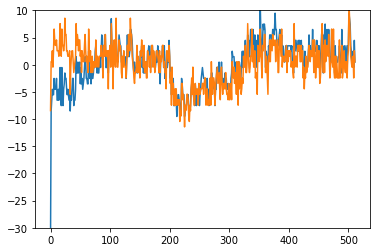

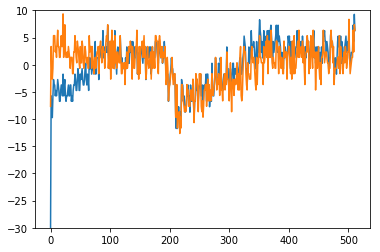

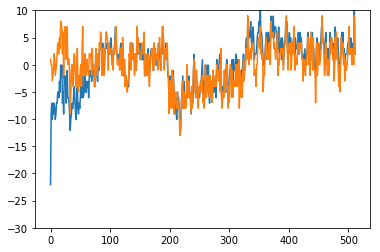

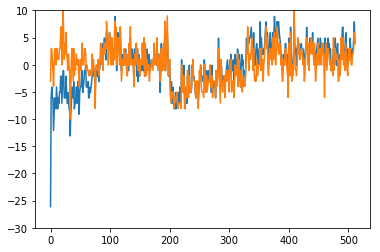

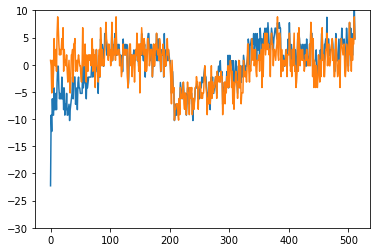

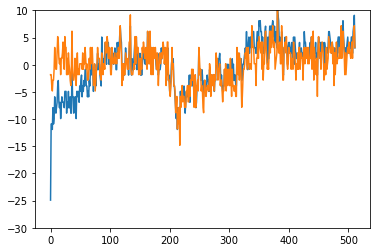

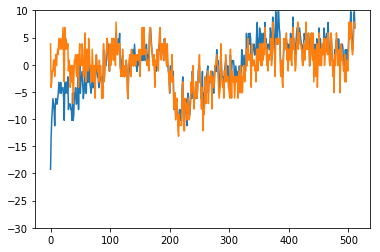

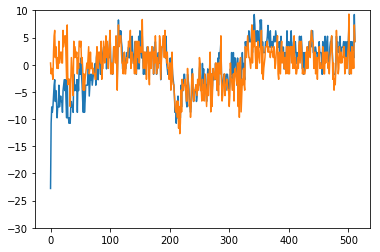

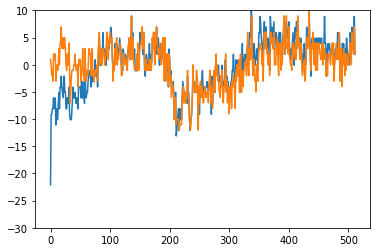

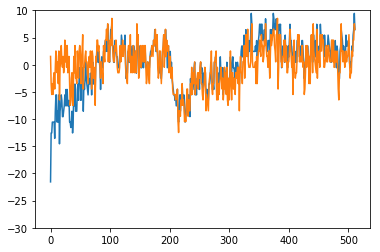

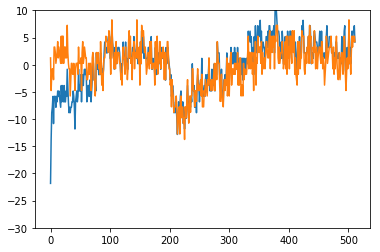

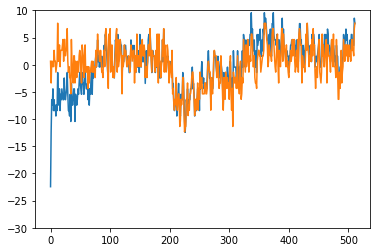

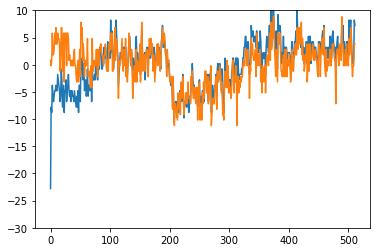

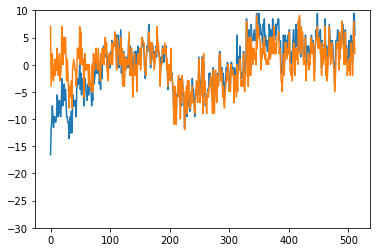

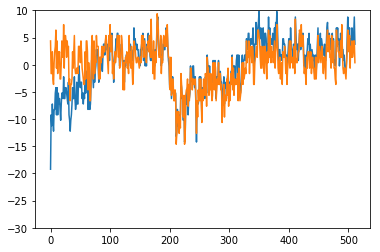

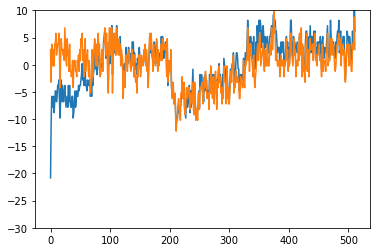

In [50]:
EID=1
#ADCdf[ADCdf['EventID']==EID].iloc[:,3:].sum(axis=0).plot()
s = 0
for _ in range(s,s+20):
    #EID=s
    plt.figure()
    plt.plot(RawADCdf[RawADCdf['EventID']==EID].iloc[_,3:].values-RawADCdf[RawADCdf['EventID']==EID].iloc[_,3:].values.mean())
    plt.plot(ADCdf[ADCdf['EventID']==EID].iloc[_,3:].values-ADCdf[ADCdf['EventID']==EID].iloc[_,3:].values.mean())
    plt.ylim([-30,10])


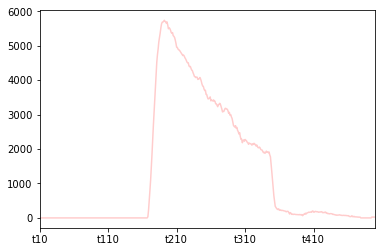

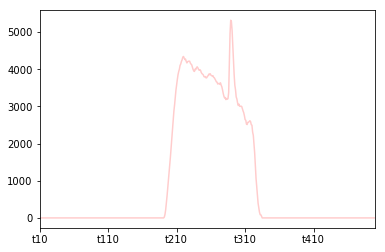

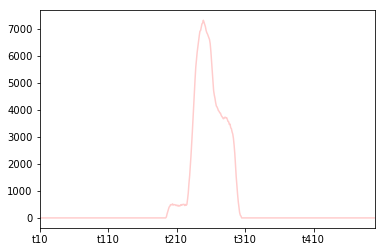

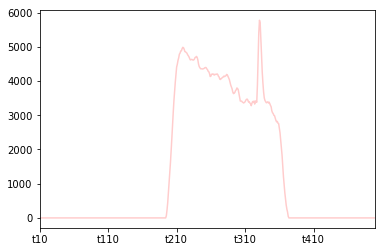

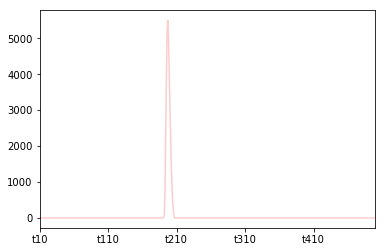

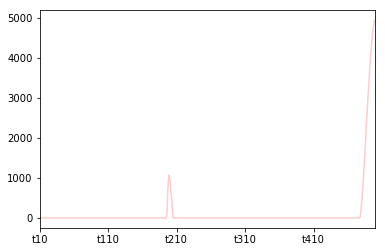

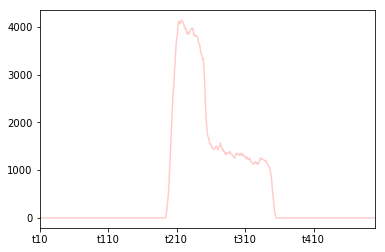

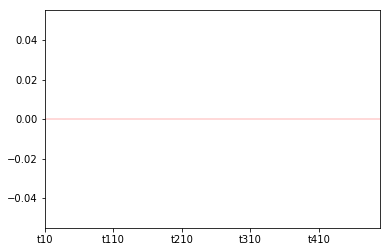

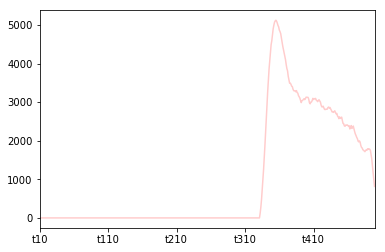

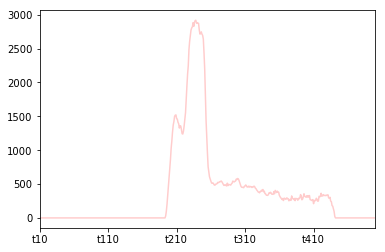

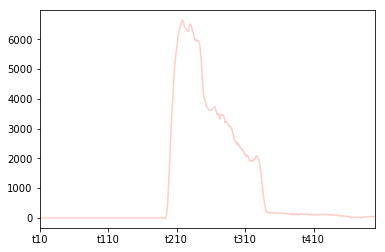

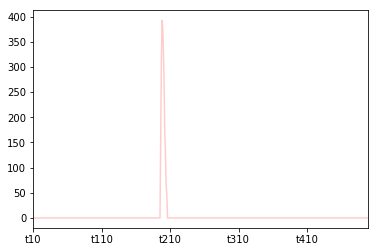

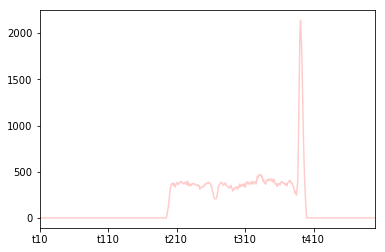

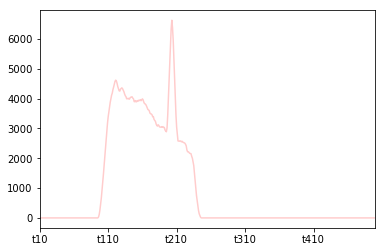

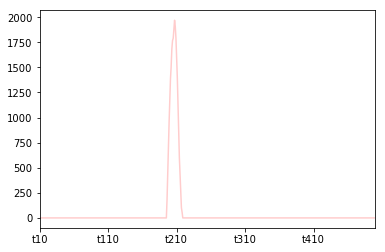

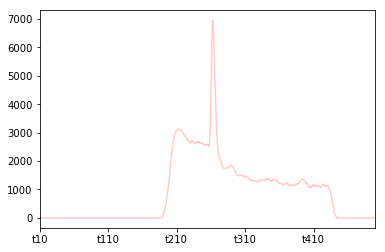

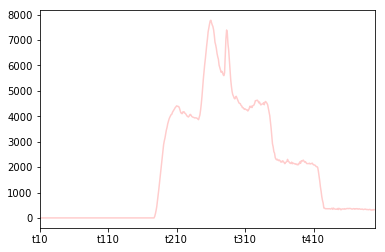

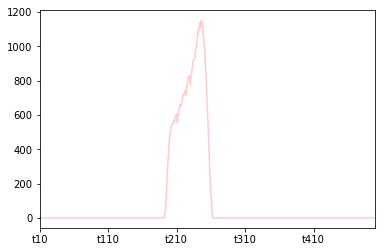

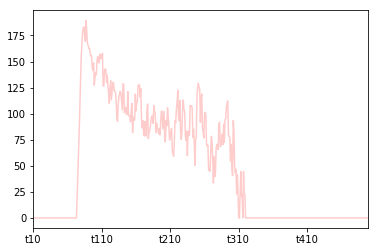

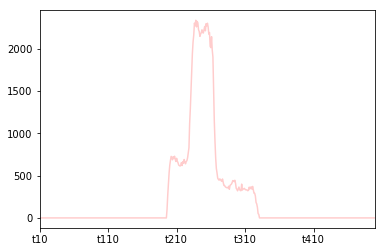

In [55]:
for i in range(20):
    plt.figure()
    mesh_df.iloc[i,10:500].T.plot(c=(1,0,0,0.2))